In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# EDA

In [78]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# 다운받은 csv를 pandas의 DataFrame 형식으로 불러옵니다.
data = pd.read_csv('/content/drive/MyDrive/ML DL STUDY/data/train.csv')

# id 는 제외하고 분석합니다.
data = data.drop('id', axis=1)
pd.set_option('display.max_columns', None) # 컬럼 수가 많으므로 요약되어 표시되지 않게 합니다.
data # 데이터를 확인합니다.

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,Loyal Customer,30,Personal Travel,Eco,2377,1,5,1,1,1,4,4,1,3,5,3,4,2,4,211,225.0,0
2996,Female,disloyal Customer,24,Business travel,Eco,1643,2,4,3,4,5,3,5,5,2,2,4,1,3,5,20,13.0,0
2997,Female,disloyal Customer,22,Business travel,Eco,1442,2,2,2,3,4,2,4,4,3,2,3,4,3,4,64,67.0,0
2998,Female,disloyal Customer,33,Business travel,Business,2158,2,2,2,5,4,2,4,4,5,2,5,5,5,4,0,3.0,0


In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
Gender                               3000 non-null object
Customer Type                        3000 non-null object
Age                                  3000 non-null int64
Type of Travel                       3000 non-null object
Class                                3000 non-null object
Flight Distance                      3000 non-null int64
Seat comfort                         3000 non-null int64
Departure/Arrival time convenient    3000 non-null int64
Food and drink                       3000 non-null int64
Gate location                        3000 non-null int64
Inflight wifi service                3000 non-null int64
Inflight entertainment               3000 non-null int64
Online support                       3000 non-null int64
Ease of Online booking               3000 non-null int64
On-board service                     3000 non-null int64
Leg room service                  

In [79]:
def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(data)

결측치가 존재하지 않습니다


In [80]:
# 기초 통계량을 살펴봅니다.
data.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,39.203000,1983.079333,2.863333,3.009667,2.874333,3.016667,3.259667,3.352333,3.50500,3.488000,3.497000,3.485000,3.728667,3.370000,3.728667,3.356333,15.634333,15.922000,0.556000
std,15.108802,1028.109117,1.394981,1.519543,1.431511,1.294713,1.322683,1.352826,1.31068,1.302211,1.283436,1.294218,1.154190,1.258158,1.161678,1.294057,45.083228,45.203411,0.496937
min,7.000000,52.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.00000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1348.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,39.000000,1937.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000
75%,51.000000,2547.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,80.000000,6882.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1128.000000,1115.000000,1.000000


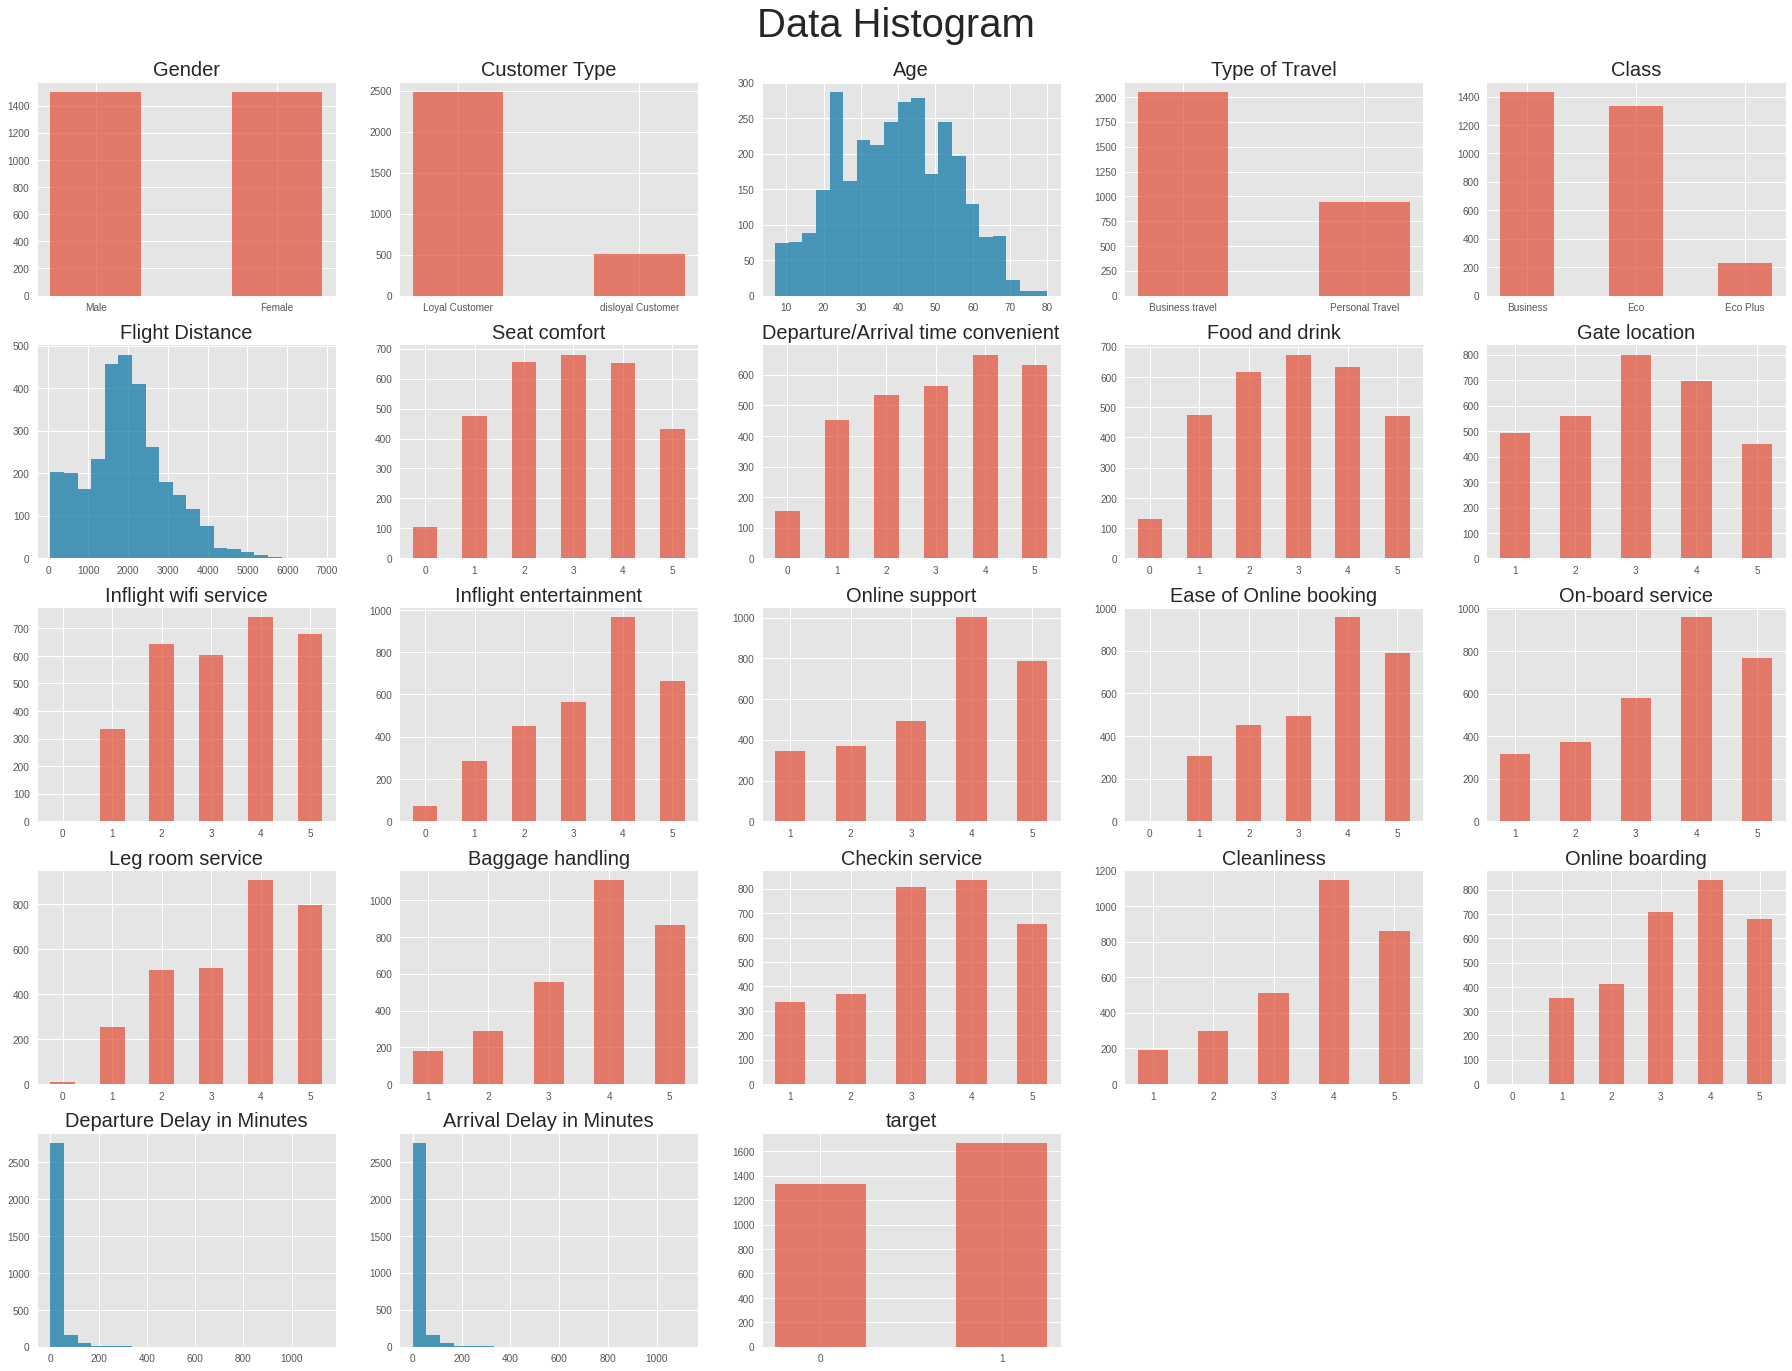

In [81]:
plt.style.use("ggplot")
from scipy import stats
# 히스토그램 을 사용해서 데이터의 분포를 살펴봅니다.
plt.figure(figsize=(25,20))
plt.suptitle("Data Histogram", fontsize=40)

# id는 제외하고 시각화합니다.
cols = data.columns
for i in range(len(cols)):
    plt.subplot(5,5,i+1)
    plt.title(cols[i], fontsize=20)
    if len(data[cols[i]].unique()) > 20:
        plt.hist(data[cols[i]], bins=20, color='b', alpha=0.7)
    else:
        temp = data[cols[i]].value_counts()
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

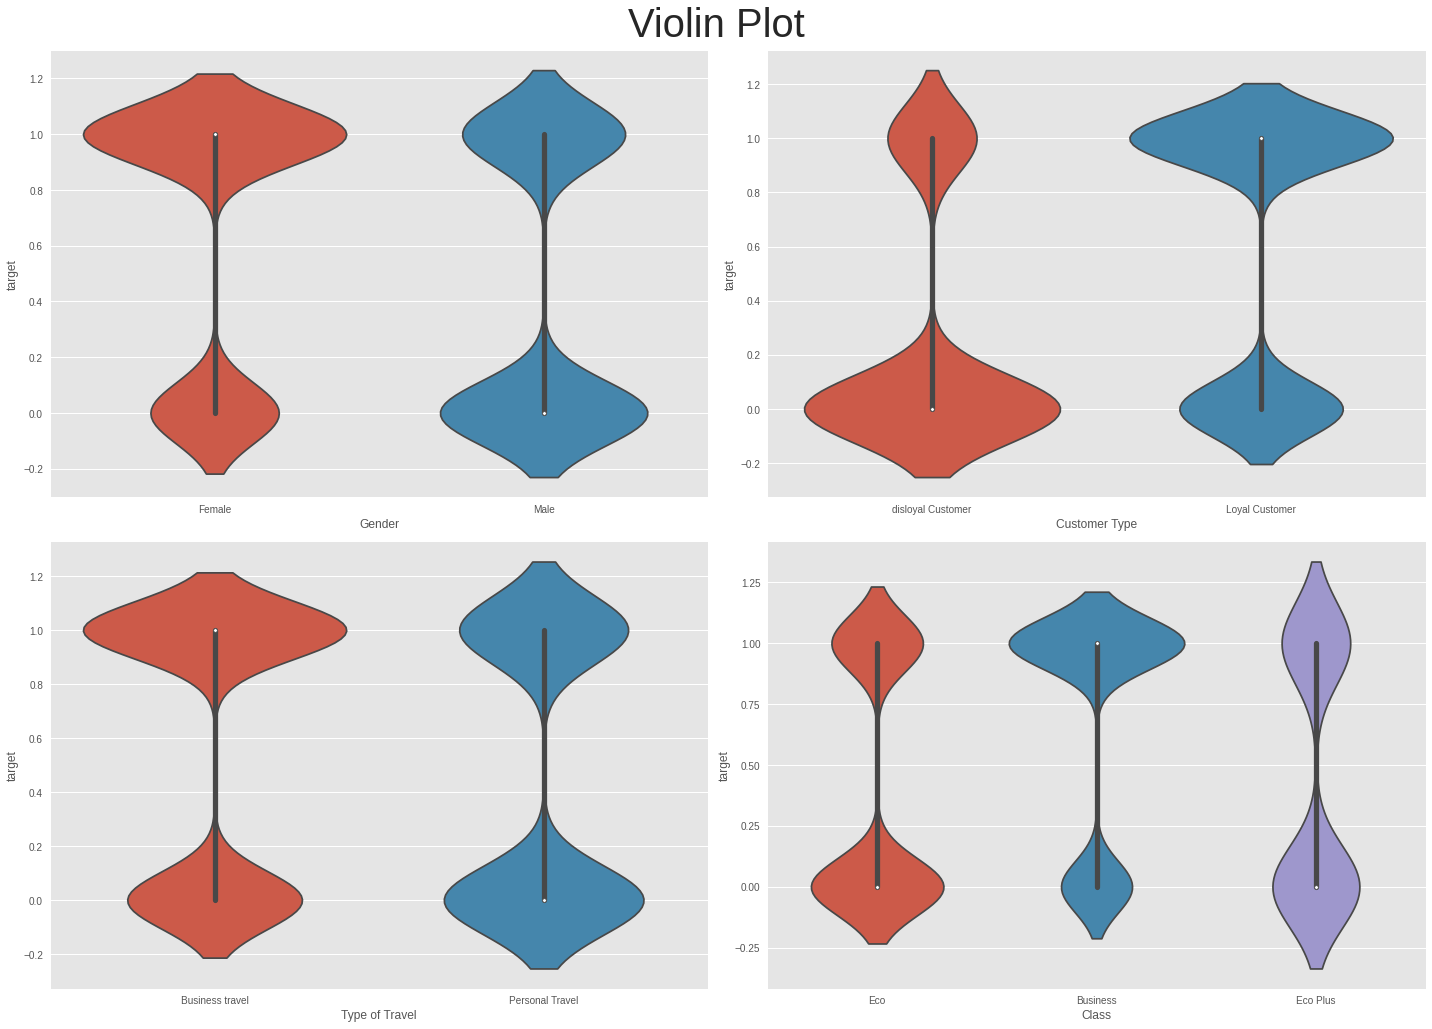

In [82]:
# 타겟 설정
target = "target"
# 범주형 데이터 분리
categorical_feature = data.columns[data.dtypes=='object']

plt.figure(figsize=(20,15))
plt.suptitle("Violin Plot", fontsize=40)

# id는 제외하고 시각화합니다.
for i in range(len(categorical_feature)):
    plt.subplot(2,2,i+1)
    plt.xlabel(categorical_feature[i])
    plt.ylabel(target)
    sns.violinplot(x= data[categorical_feature[i]], y= data[target])
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

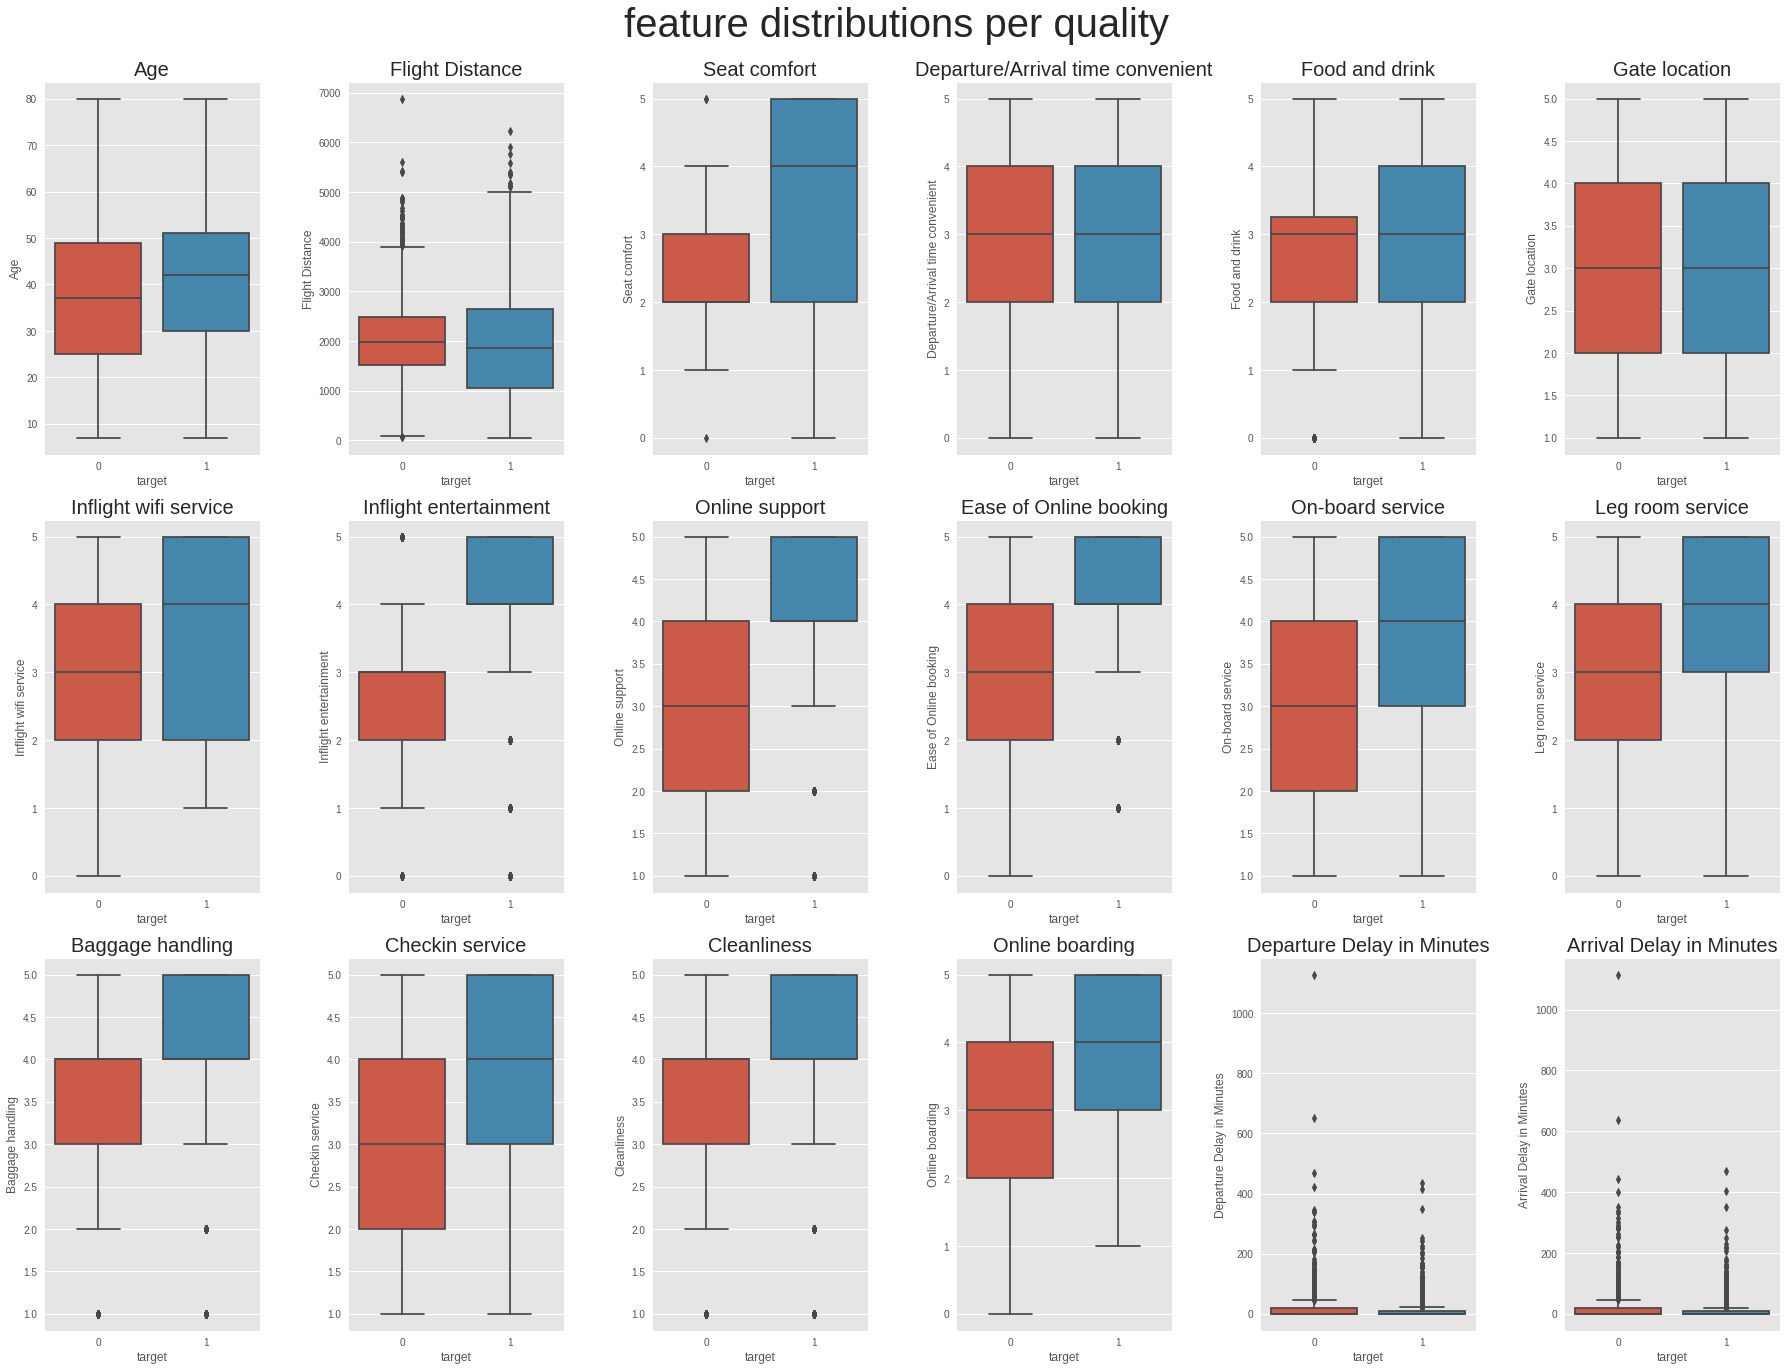

In [83]:
# 수치형 데이터 분리
numeric_feature = data.columns[(data.dtypes=='int64') | (data.dtypes=='float')]
num_data = data[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(3, 6, figsize=(25, 20))

fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_data.columns[:-1]):
    sns.boxplot(x= 'target', y= col, ax=ax, data=num_data)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [84]:
# 먼저 상관계수 계산을 위해 텍스트 형식의 데이터를 숫자로 변환해줍니다.
corr_df = data.copy()
corr_df[corr_df.columns[corr_df.dtypes=='O']] = corr_df[corr_df.columns[corr_df.dtypes=='O']].astype(str).apply(LabelEncoder().fit_transform)

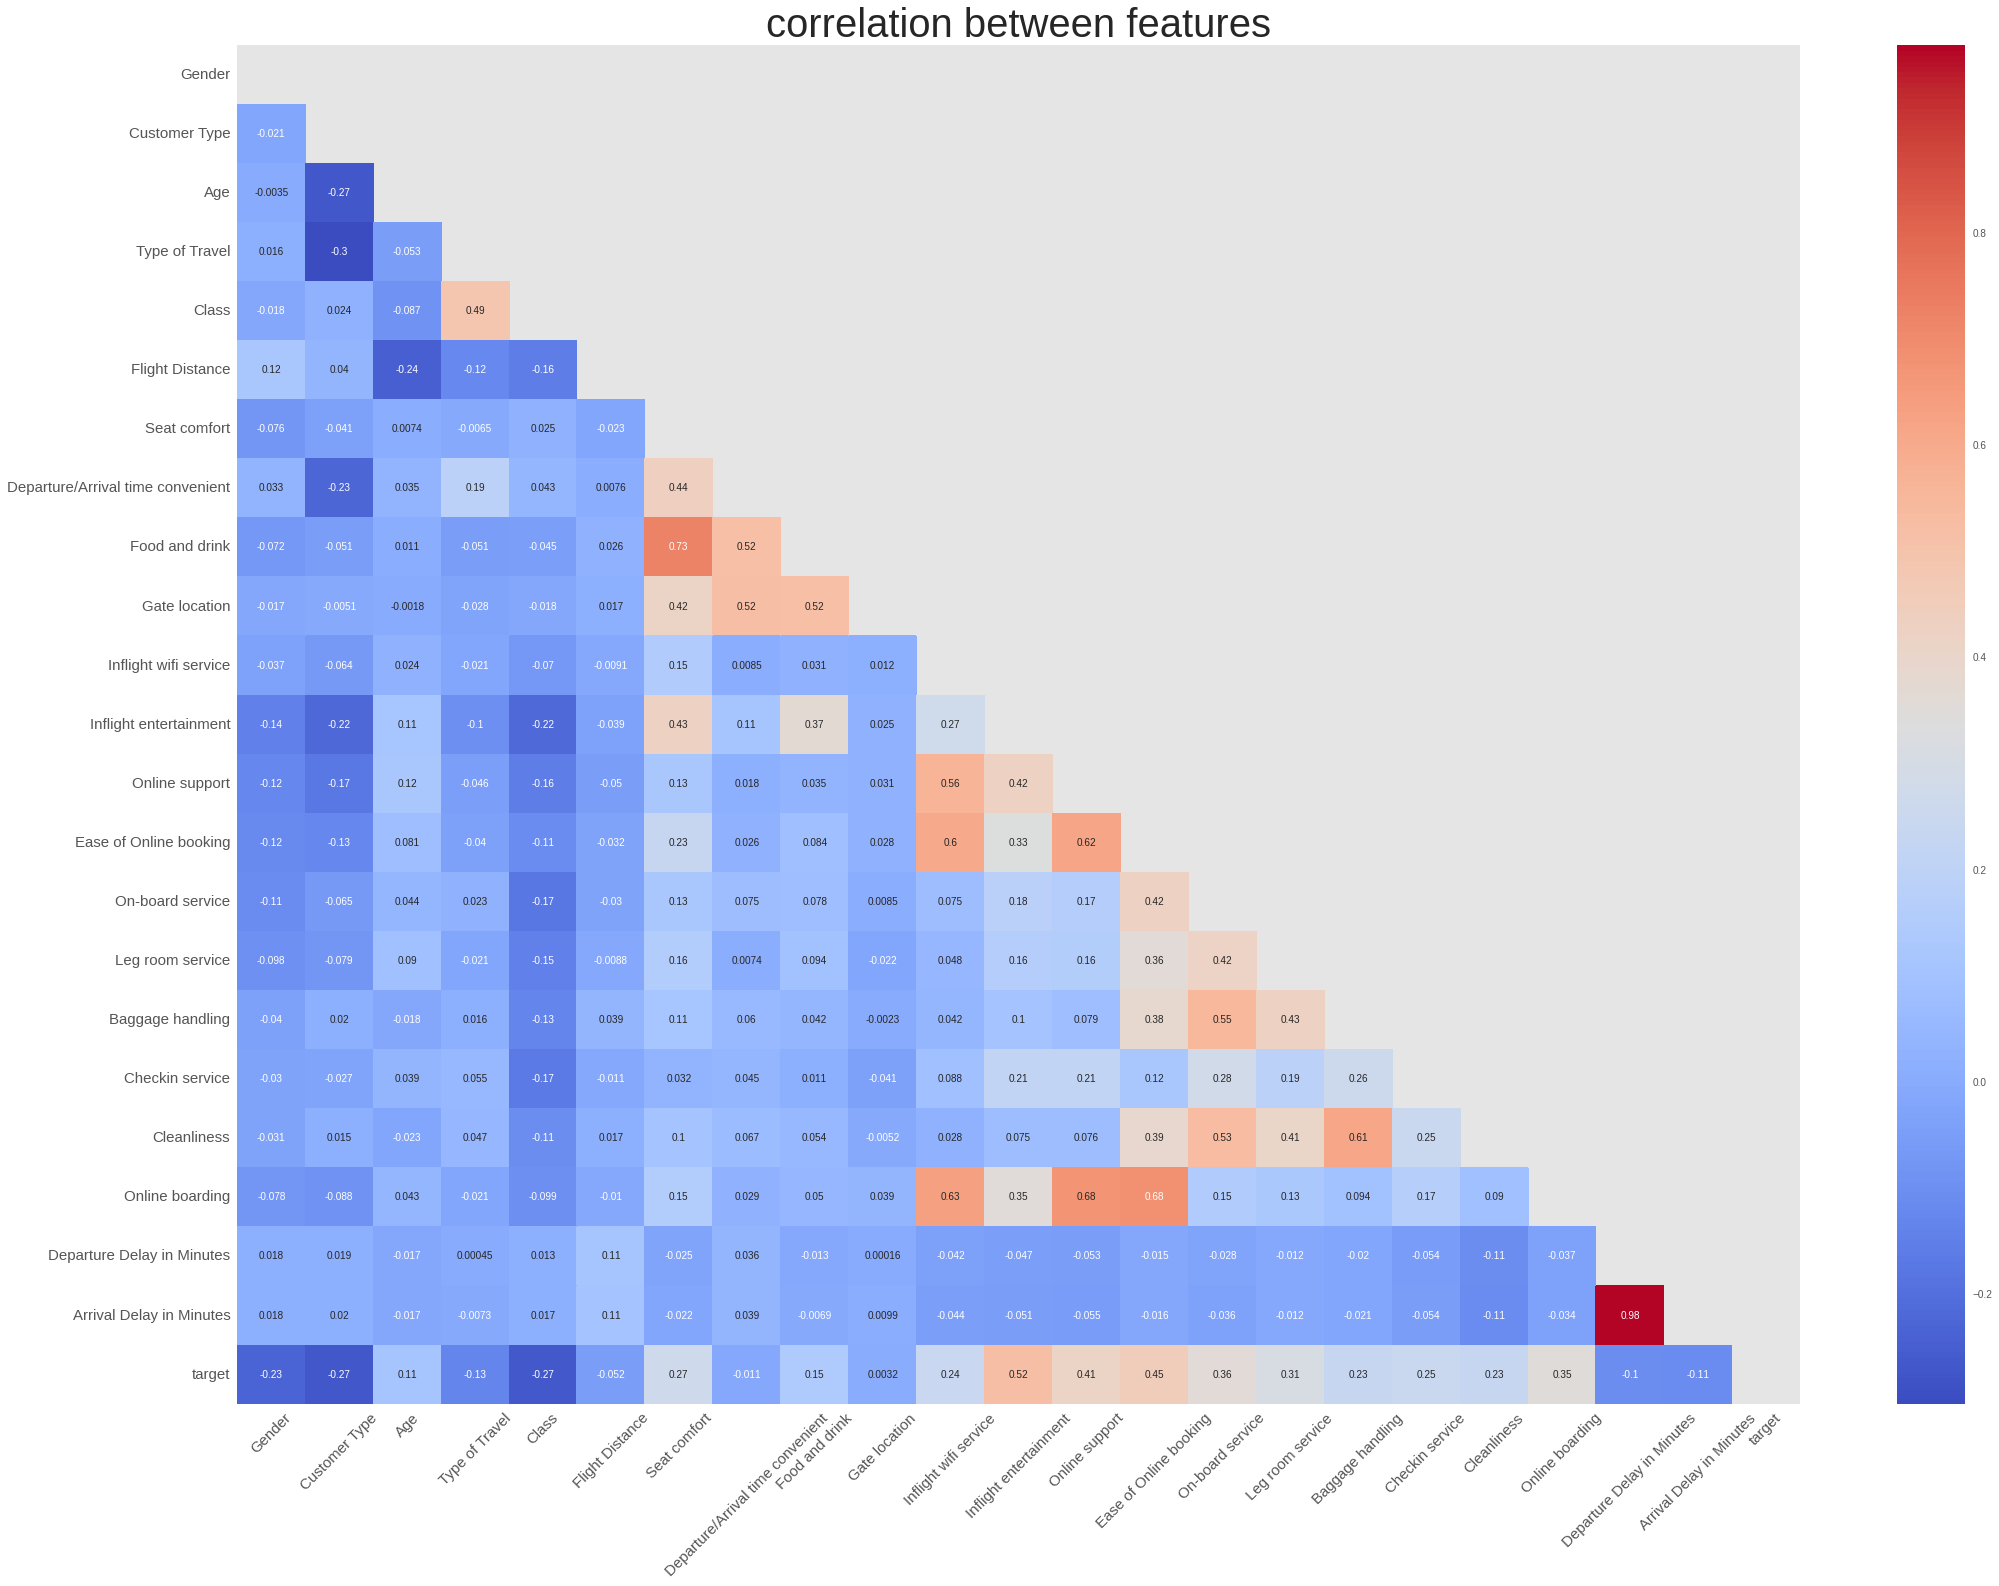

In [85]:
plt.figure(figsize=(35,25))

heat_table = corr_df.corr()
mask = np.zeros_like(heat_table)
mask[np.triu_indices_from(mask)] = True
heatmap_ax = sns.heatmap(heat_table, annot=True, mask = mask, cmap='coolwarm')
heatmap_ax.set_xticklabels(heatmap_ax.get_xticklabels(), fontsize=15, rotation=45)
heatmap_ax.set_yticklabels(heatmap_ax.get_yticklabels(), fontsize=15)
plt.title('correlation between features', fontsize=40)
plt.show()

# 데이터를 통한 insight 도출

In [86]:
numeric_feature = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
ordinal_feature = ['Seat comfort', 'Departure/Arrival time convenient', 'Food and drink', 'Gate location', 
           'Inflight wifi service', 'Inflight entertainment', 'Online support', 'Ease of Online booking', 
           'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding']
categorical_feature = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

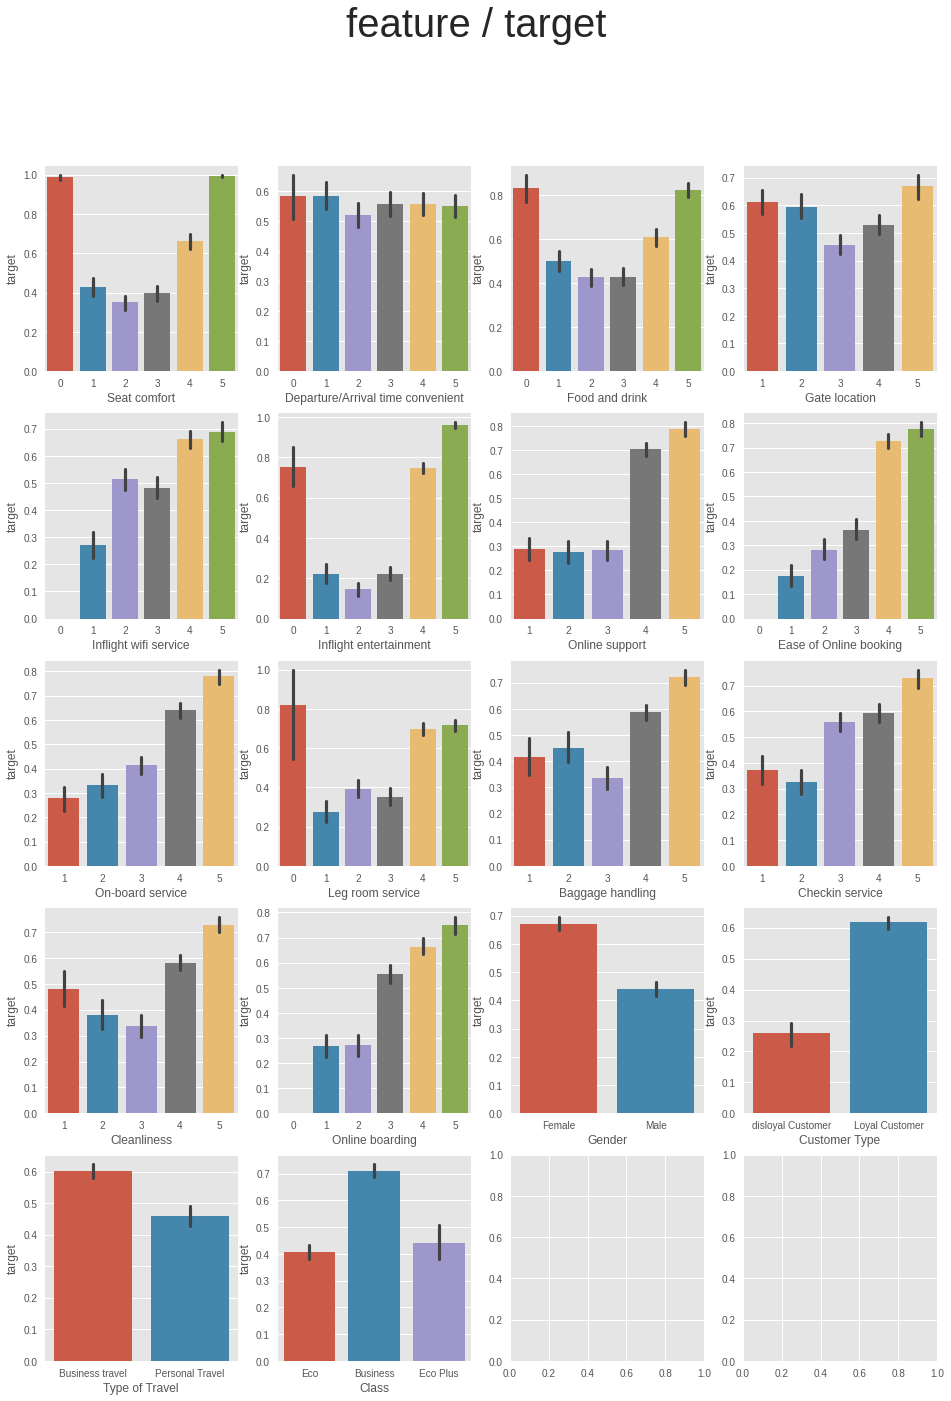

In [87]:
fig, ax = plt.subplots(5, 4, figsize = (16, 22))

plt.suptitle("feature / target", fontsize=40)

feature = ordinal_feature + categorical_feature

xvalue = 0
yvalue = 0

for xstr in feature:
    sns.barplot(x = xstr, y = 'target', data = data, ax = ax[yvalue][xvalue])
        
    if xvalue == 3:
        xvalue = 0
        yvalue += 1
    else:
        xvalue += 1

ordinary data에서 0의 수치 값을 점수 0으로 처리할것인지 아니면 결측값이 0으로 처리된것인지에 대한 마땅한 기준이 데이터에는 제시되어 있지 않습니다.
따라서 이를 어찌 처리할 마땅한 기준이 필요하였습니다. 아래 데이터를 기준으로 target과 data간의 관계를 살펴본 결과 0에서 점수 0으로 처리 되었다는 근거가 부족하다는 결론이 나왔습니다.

In [88]:
print("Train data missing value")
for feature in ordinal_feature:
    if len(data[data[feature] == 0]) > 0:
        print(feature, len(data[data[feature] == 0]))

Train data missing value
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1


머신러닝9. 범주형 데이터 결측치 처리 (datawig)
다른 방법에 비에 꽤나 정확하다.
범주형 데이터(Feature Encoder)를 처리할 수 있는 기능이 있다.
CPU, GPU를 지원한다.

# Modeling

In [89]:
import pandas as pd

train = pd.read_csv("/content/drive/MyDrive/ML DL STUDY/data/train.csv")
test = pd.read_csv('/content/drive/MyDrive/ML DL STUDY/data/test.csv')

train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,target
0,1,Female,disloyal Customer,22,Business travel,Eco,1599,3,0,3,3,4,3,4,4,5,4,4,4,5,4,0,0.0,0
1,2,Female,Loyal Customer,37,Business travel,Business,2810,2,4,4,4,1,4,3,5,5,4,2,1,5,2,18,18.0,0
2,3,Male,Loyal Customer,46,Business travel,Business,2622,1,1,1,1,4,5,5,4,4,4,4,5,4,3,0,0.0,1
3,4,Female,disloyal Customer,24,Business travel,Eco,2348,3,3,3,3,3,3,3,3,2,4,5,3,4,3,10,2.0,0
4,5,Female,Loyal Customer,58,Business travel,Business,105,3,3,3,3,4,4,5,4,4,4,4,4,4,5,0,0.0,1


## 결측치 처리(0 값을 어떻게 처리할 것인가?)
- Train data missing value
- Seat comfort 106
- Departure/Arrival time convenient 154
- Food and drink 129
- Inflight wifi service 2
- Inflight entertainment 73
- Ease of Online booking 1
- Leg room service 11
- Online boarding 1

In [90]:
print("Train data missing value")
for feature in ordinal_feature:
    if len(train[train[feature] == 0]) > 0:
        print(feature, len(train[train[feature] == 0]))

Train data missing value
Seat comfort 106
Departure/Arrival time convenient 154
Food and drink 129
Inflight wifi service 2
Inflight entertainment 73
Ease of Online booking 1
Leg room service 11
Online boarding 1


## datawig를 이용한 Leg room service 결측치 처리
 - 결측치가 있는 변수에 대해 딥러닝을 적용하여 모델을 학습하고, 결측치를 예측하는 것
 - 관련 있는 변수를 선택하고 이를 이용해 예측하는 식으로 진행된다.

In [91]:
#pip install datawig

In [92]:
for i in range(len(train)):
    for feature in ordinal_feature:
        if train[feature].iloc[i] == 0:
            train[feature].iloc[i] = np.nan

for i in range(len(test)):
    for feature in ordinal_feature:
        if test[feature].iloc[i] == 0:
            test[feature].iloc[i] = np.nan

In [93]:
import datawig

target_feature = "Leg room service"

imputer = datawig.SimpleImputer(input_columns=['Baggage handling', 'On-board service', 'Cleanliness'],
                                output_column=target_feature)
imputer.fit(train_df=train, num_epochs=50)

null_train = train[train[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(train)):
    if np.isnan(train[target_feature].iloc[i]) == True:
        train[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1
        
null_train = test[test[target_feature].isnull()]
null_imputed = imputer.predict(null_train)
imputed_train = pd.DataFrame(null_imputed)

n = 0
for i in range(len(test)):
    if np.isnan(test[target_feature].iloc[i]) == True:
        test[target_feature].iloc[i] = int(round(imputed_train[target_feature+"_imputed"].iloc[n]))
        n += 1

In [94]:
train = train.fillna(0)
train.isna().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
target                               0
dtype: int64

# 새로운 feature를 통해 예측력 높이기
- 상관관계가 높은 Departure Delay in Minutes, Arrival Delay in Minutes 이 2가지 변수를 하나의 feature로 변환(Total_Delayed)

In [95]:
train["Total_Delayed"] = (train["Departure Delay in Minutes"] + train["Arrival Delay in Minutes"])
train["Total_Delayed"] = train["Total_Delayed"].astype(int)

test["Total_Delayed"] = (test["Departure Delay in Minutes"] + test["Arrival Delay in Minutes"])
test["Total_Delayed"] = test["Total_Delayed"].astype(int)

###원-핫 인코딩

In [96]:
train_one_hot = pd.get_dummies(train)
train_x = train_one_hot.drop(["id"],axis=1)

### 라벨 인코딩

In [97]:
"""train_x = train.drop(["id"],axis=1)

train_y = train.target 

#라벨인코딩을 하기 위함 dictionary map 생성 함수
def make_label_map(dataframe):
    label_maps = {}
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            label_map = {'unknown':0}
            for i, key in enumerate(dataframe[col].unique()):
                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.
            label_maps[col] = label_map
    return label_maps

# 각 범주형 변수에 인코딩 값을 부여하는 함수
def label_encoder(dataframe, label_map):
    for col in dataframe.columns:
        if dataframe[col].dtype=='object':
            dataframe[col] = dataframe[col].map(label_map[col])
            dataframe[col] = dataframe[col].fillna(label_map[col]['unknown']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.
    return dataframe

# train 데이터 라벨 인코딩
label_map = make_label_map(train_x) # train 사용해 label map 생성
train_x = label_encoder(train_x, label_map) # train 라벨 인코딩

train_x.head()
"""

'train_x = train.drop(["id"],axis=1)\n\ntrain_y = train.target \n\n#라벨인코딩을 하기 위함 dictionary map 생성 함수\ndef make_label_map(dataframe):\n    label_maps = {}\n    for col in dataframe.columns:\n        if dataframe[col].dtype==\'object\':\n            label_map = {\'unknown\':0}\n            for i, key in enumerate(dataframe[col].unique()):\n                label_map[key] = i+1  #새로 등장하는 유니크 값들에 대해 1부터 1씩 증가시켜 키값을 부여해줍니다.\n            label_maps[col] = label_map\n    return label_maps\n\n# 각 범주형 변수에 인코딩 값을 부여하는 함수\ndef label_encoder(dataframe, label_map):\n    for col in dataframe.columns:\n        if dataframe[col].dtype==\'object\':\n            dataframe[col] = dataframe[col].map(label_map[col])\n            dataframe[col] = dataframe[col].fillna(label_map[col][\'unknown\']) #혹시 모를 결측값은 unknown의 값(0)으로 채워줍니다.\n    return dataframe\n\n# train 데이터 라벨 인코딩\nlabel_map = make_label_map(train_x) # train 사용해 label map 생성\ntrain_x = label_encoder(train_x, label_map) # train 라벨 인코딩\n\ntrain_x.he

## log 변환

In [98]:
"""
#feature 전
train_x['Departure Delay in Minutes'] = np.log1p(train_x['Departure Delay in Minutes'])
train_x['Arrival Delay in Minutes'] = np.log1p(train_x['Arrival Delay in Minutes'])

# Flight Distance 같은 경우 추후 넣을지 말지 다시 판단해보기
train_x['Flight Distance'] = np.log1p(train_x['Flight Distance'])

test['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])
test['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])
test['Flight Distance'] = np.log1p(test['Flight Distance'])
"""

"\n#feature 전\ntrain_x['Departure Delay in Minutes'] = np.log1p(train_x['Departure Delay in Minutes'])\ntrain_x['Arrival Delay in Minutes'] = np.log1p(train_x['Arrival Delay in Minutes'])\n\n# Flight Distance 같은 경우 추후 넣을지 말지 다시 판단해보기\ntrain_x['Flight Distance'] = np.log1p(train_x['Flight Distance'])\n\ntest['Departure Delay in Minutes'] = np.log1p(test['Departure Delay in Minutes'])\ntest['Arrival Delay in Minutes'] = np.log1p(test['Arrival Delay in Minutes'])\ntest['Flight Distance'] = np.log1p(test['Flight Distance'])\n"

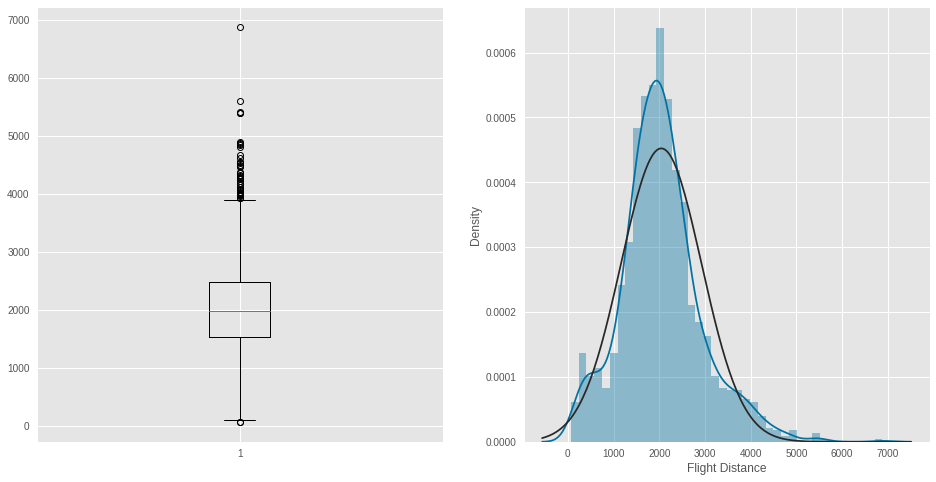

In [99]:
# 만족안한 사람들 - 비행 거리
from scipy import stats
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(train[train['target'] == 0]['Flight Distance'])

plt.subplot(1,2,2)
sns.distplot(train[train['target'] == 0]['Flight Distance'], color='b',fit=stats.norm)
plt.show()

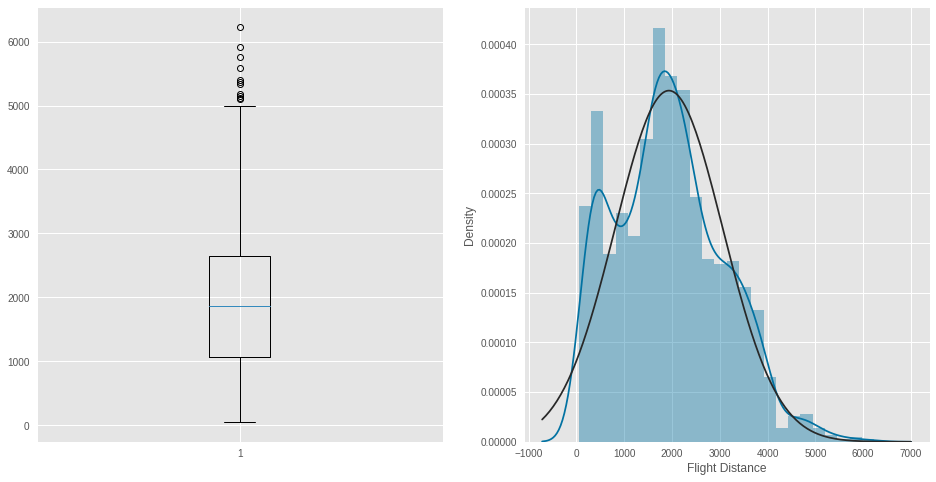

In [101]:
# 만족안한 사람들 - 비행 거리
from scipy import stats
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(train[train['target'] == 1]['Flight Distance'])

plt.subplot(1,2,2)
sns.distplot(train[train['target'] == 1]['Flight Distance'], color='b',fit=stats.norm)
plt.show()

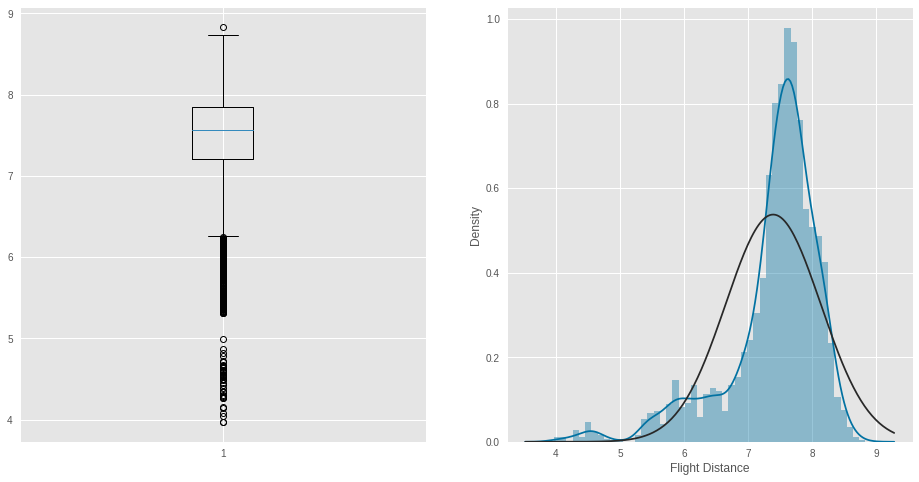

In [102]:
# log transformation 진행했을 때 오른쪽으로 편향되니 transformation 적용 X

plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.boxplot(np.log1p(train['Flight Distance']))

plt.subplot(1,2,2)
sns.distplot(np.log1p(train['Flight Distance']), color='b',fit=stats.norm)
plt.show()

In [103]:
train_x['Total_Delayed'] = np.log1p(train_x['Total_Delayed'])
#train_x['Flight Distance'] = np.log1p(train_x['Flight Distance'])

test['Total_Delayed'] = np.log1p(test['Total_Delayed'])
#test['Flight Distance'] = np.log1p(test['Flight Distance'])

# StandardScaler를 통한 예측력 증대
- min-max는 성능 문제로 사용하지 않음

In [104]:
from sklearn.preprocessing import StandardScaler

num_features = ['Age','Flight Distance','Total_Delayed']

#StandardScaler 객체 생성
scaler = StandardScaler()
train_x[num_features] = scaler.fit_transform(train_x[num_features])
train_x.head()

#테스트 셋에 별도의 fit작업을 하는것이 아닌 그저 transform을 시켜줘야한다!!!!!!!!
test[num_features] = scaler.transform(test[num_features])

# 특정 columns 제거

In [105]:
train_x = train.drop(['Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'Departure/Arrival time convenient'], axis = 1)
test = test.drop(['Food and drink', 'Departure/Arrival time convenient', 'Departure Delay in Minutes', 'id', 'Departure/Arrival time convenient'], axis = 1)

In [106]:
#pip install pycaret

pycaret은 기존에 있던 Scikit-learn, XGBoost, LightGBM, spaCy 등 여러가지 머신러닝 라이브러리를 ML High-Level API로 제작한 라이브러리다. 단 몇 줄만에 데이터 분석 및 머신러닝 모델 성능 비교까지 가능하고, Log를 생성하여 이력을 남겨주는 장점이 있다.

In [107]:
from pycaret.classification import *
clf1 = setup(data = train_x,
             silent = True,
             target = 'target',
             session_id = 20201809,
             n_jobs = 7)

,Description,Value
0,session_id,20201809
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(3000, 22)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [108]:
best = compare_models(n_select=3, fold = 10) #상위 모델 3개를 선택합니다

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9252,0.9797,0.9395,0.9299,0.9343,0.8475,0.8485,1.012
rf,Random Forest Classifier,0.9119,0.9685,0.9293,0.9169,0.9228,0.8201,0.8210,0.441
gbc,Gradient Boosting Classifier,0.9095,0.9758,0.9226,0.9187,0.9202,0.8156,0.8166,0.444
et,Extra Trees Classifier,0.8990,0.9665,0.8999,0.9203,0.9098,0.7950,0.7957,0.390
ada,Ada Boost Classifier,0.8919,0.9549,0.9008,0.9082,0.9041,0.7801,0.7811,0.215
dt,Decision Tree Classifier,0.8819,0.8797,0.8957,0.8964,0.8957,0.7594,0.7602,0.048
ridge,Ridge Classifier,0.8480,0.0000,0.8604,0.8707,0.8653,0.6910,0.6915,0.040
lda,Linear Discriminant Analysis,0.8466,0.9163,0.8587,0.8698,0.8640,0.6881,0.6887,0.037
lr,Logistic Regression,0.8352,0.9131,0.8570,0.8537,0.8551,0.6640,0.6646,2.147
nb,Naive Bayes,0.7837,0.8737,0.7880,0.8232,0.8046,0.5626,0.5642,0.045


In [109]:
blend_3_soft = blend_models(estimator_list=best, method='soft', choose_better = True)
predict_model(blend_3_soft).head(10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9333,0.9849,0.9244,0.9565,0.9402,0.8650,0.8656
1,0.9286,0.9734,0.9076,0.9643,0.9351,0.8559,0.8578
2,0.9381,0.9881,0.9832,0.9141,0.9474,0.8725,0.8759
3,0.9048,0.9732,0.9160,0.9160,0.9160,0.8061,0.8061
4,0.9286,0.9866,0.9664,0.9127,0.9388,0.8532,0.8552
5,0.9095,0.9745,0.9328,0.9098,0.9212,0.8151,0.8154
6,0.9238,0.9708,0.9496,0.9187,0.9339,0.8441,0.8447
7,0.9333,0.9787,0.9580,0.9268,0.9421,0.8635,0.8642
8,0.9190,0.9756,0.9328,0.9250,0.9289,0.8350,0.8350
9,0.9282,0.9769,0.9492,0.9256,0.9372,0.8535,0.8538


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9234,0.9808,0.9541,0.9067,0.9298,0.8457,0.847


,Age,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Ease of Online booking,Leg room service,Online boarding,Arrival Delay in Minutes,Total_Delayed,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,target,Label,Score
0,47.0,974.0,4.0,1.0,3.0,4.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8149
1,38.0,1236.0,5.0,5.0,5.0,4.0,4.0,4.0,17.0,47.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9998
2,26.0,2065.0,4.0,3.0,4.0,3.0,4.0,3.0,17.0,28.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8324
3,25.0,2934.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9993
4,14.0,3119.0,4.0,4.0,5.0,5.0,5.0,5.0,14.0,14.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9777
5,43.0,4113.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.7678
6,26.0,2233.0,2.0,4.0,2.0,4.0,5.0,4.0,61.0,138.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9874
7,37.0,4188.0,1.0,5.0,1.0,5.0,4.0,5.0,5.0,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9417
8,48.0,2522.0,5.0,4.0,1.0,5.0,5.0,4.0,6.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9995
9,36.0,534.0,1.0,5.0,4.0,1.0,1.0,3.0,10.0,46.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.9281


In [110]:
stack_3_soft = stack_models(estimator_list=best)
predict_model(stack_3_soft).head(10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9429,0.9903,0.9328,0.9652,0.9487,0.8842,0.8849
1,0.9190,0.9777,0.8992,0.9554,0.9264,0.8366,0.8385
2,0.9333,0.9897,0.9748,0.9134,0.9431,0.8628,0.8655
3,0.9048,0.9671,0.9160,0.9160,0.9160,0.8061,0.8061
4,0.9238,0.9745,0.9580,0.9120,0.9344,0.8436,0.8451
5,0.9000,0.9560,0.9244,0.9016,0.9129,0.7956,0.7959
6,0.9095,0.9681,0.9244,0.9167,0.9205,0.8155,0.8156
7,0.9333,0.9713,0.9580,0.9268,0.9421,0.8635,0.8642
8,0.9333,0.9768,0.9412,0.9412,0.9412,0.8643,0.8643
9,0.9282,0.9789,0.9492,0.9256,0.9372,0.8535,0.8538


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Stacking Classifier,0.9179,0.9752,0.9478,0.9026,0.9246,0.8345,0.8357


,Age,Flight Distance,Seat comfort,Inflight wifi service,Inflight entertainment,Ease of Online booking,Leg room service,Online boarding,Arrival Delay in Minutes,Total_Delayed,Gender_Female,Customer Type_Loyal Customer,Type of Travel_Business travel,Class_Business,Class_Eco,Class_Eco Plus,Gate location_1,Gate location_2,Gate location_3,Gate location_4,Gate location_5,Online support_1,Online support_2,Online support_3,Online support_4,Online support_5,On-board service_1,On-board service_2,On-board service_3,On-board service_4,On-board service_5,Baggage handling_1,Baggage handling_2,Baggage handling_3,Baggage handling_4,Baggage handling_5,Checkin service_1,Checkin service_2,Checkin service_3,Checkin service_4,Checkin service_5,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,target,Label,Score
0,47.0,974.0,4.0,1.0,3.0,4.0,4.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.6147
1,38.0,1236.0,5.0,5.0,5.0,4.0,4.0,4.0,17.0,47.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9841
2,26.0,2065.0,4.0,3.0,4.0,3.0,4.0,3.0,17.0,28.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,0.8554
3,25.0,2934.0,2.0,4.0,4.0,4.0,4.0,4.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1,1,0.9856
4,14.0,3119.0,4.0,4.0,5.0,5.0,5.0,5.0,14.0,14.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9516
5,43.0,4113.0,3.0,4.0,3.0,4.0,2.0,4.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.8844
6,26.0,2233.0,2.0,4.0,2.0,4.0,5.0,4.0,61.0,138.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9527
7,37.0,4188.0,1.0,5.0,1.0,5.0,4.0,5.0,5.0,8.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9602
8,48.0,2522.0,5.0,4.0,1.0,5.0,5.0,4.0,6.0,6.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0.9850
9,36.0,534.0,1.0,5.0,4.0,1.0,1.0,3.0,10.0,46.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0,0,0.7491


In [111]:
final_stack_3_soft = finalize_model(stack_3_soft)
prediction = predict_model(final_stack_3_soft, data = test)

In [112]:
final_blend_3_soft = finalize_model(blend_3_soft)
prediction = predict_model(final_blend_3_soft, data = test)

In [113]:
print(prediction["Label"])

0       1
1       0
2       1
3       1
4       1
       ..
1995    0
1996    1
1997    0
1998    1
1999    1
Name: Label, Length: 2000, dtype: int64


In [114]:
submission = pd.read_csv("/content/drive/MyDrive/ML DL STUDY/data/sample_submission.csv")
submission.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [115]:
submission['target'] = prediction['Label']
submission.head()

,id,target
0,1,1
1,2,0
2,3,1
3,4,1
4,5,1


In [116]:
#submission.to_csv("test4(new_feature_one_stack).csv",index=False)